# INSTALAR LIBRERIAS


pip install numpy
pip install pandas
pip install statsmodels
pip install matplotlib
pip install seaborn
pip install scikit-learn
pip install tensorflow


# INCLUIR LIBRERIAS


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score

In [4]:
data = pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


PREPROCESAMIENTO Y ANALISIS


In [5]:
# verificamos tipos de datos y numero de columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [7]:
# Verificamos datos faltantes
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

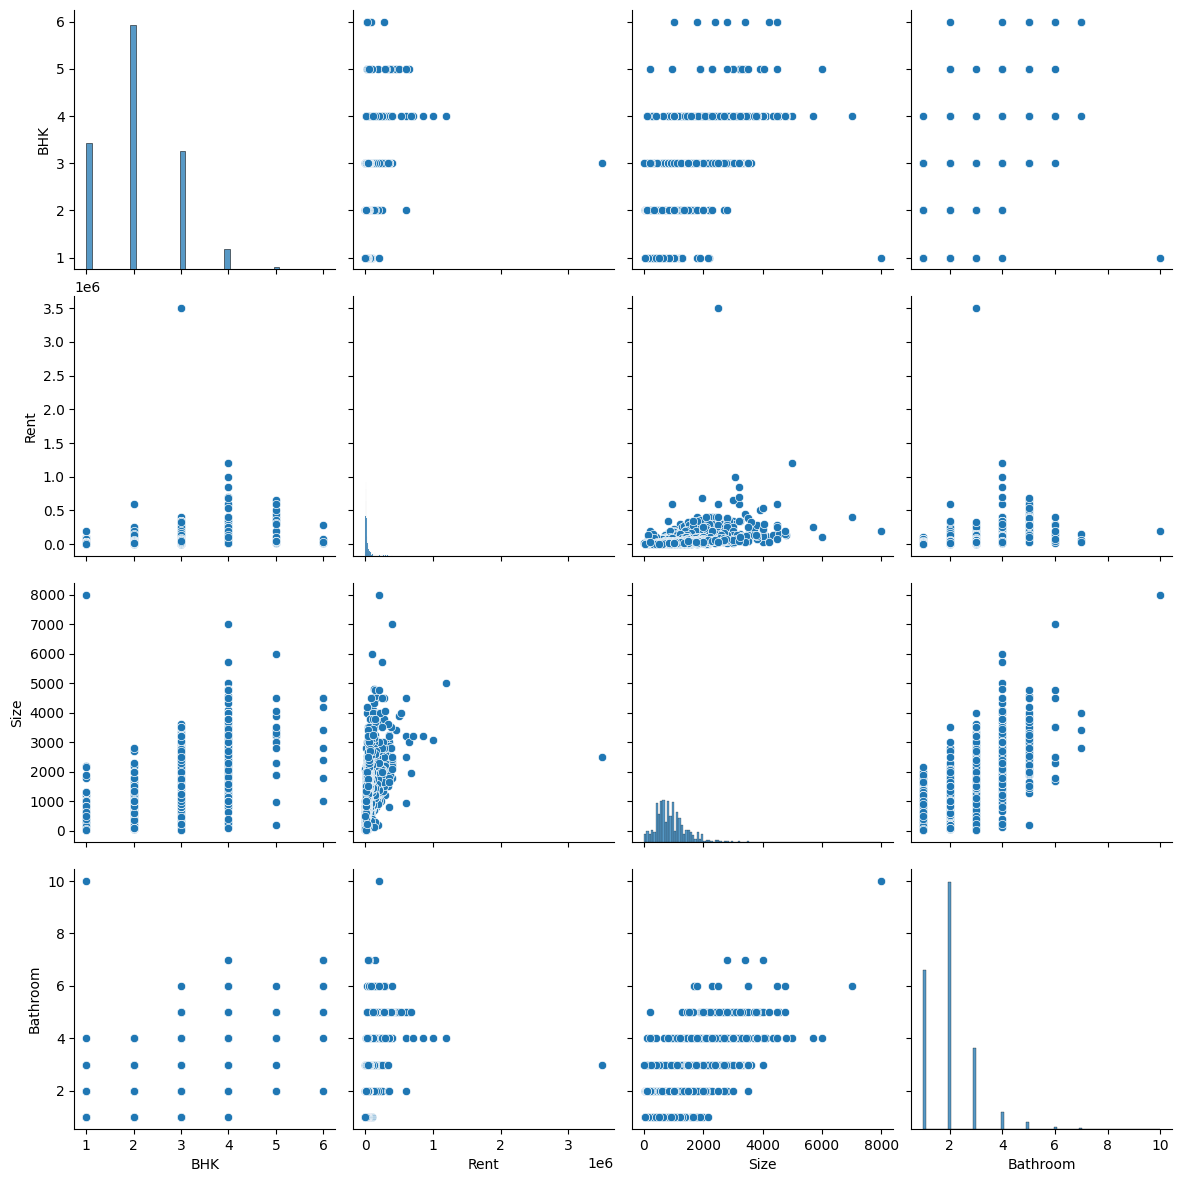

In [12]:
# Realizamos una visualizacion de cada caracteristica
sns.pairplot(data, height=3)
plt.show()

In [16]:
# Eliminamos columnas sin valor para analisis
data = data.drop(columns=['Point of Contact', 'Area Type'])
data

,Posted On,BHK,Rent,Size,Floor,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,2022-05-15,3,29000,2000,1 out of 4,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,2022-07-10,3,35000,1750,3 out of 5,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,2022-07-06,3,45000,1500,23 out of 34,Gachibowli,Hyderabad,Semi-Furnished,Family,2


ALGORTIMO DE CLUSTER


In [18]:
# Seleccionamos las caracteristicas objetivos bajo las cuales vamos a hacer la clasificacion
# Inicialmente se tomaran las caracteristicas que en las graficas anteriores mostraron mayor interacción con la renta
x = rent_data.iloc[:, [1, 10]]
x

,BHK,Bathroom
0,2,2
1,2,1
2,2,1
3,2,1
4,2,1
...,...,...
4741,2,2
4742,3,3
4743,3,3
4744,3,2


In [22]:
# Algortimo KMeans
# establecemos en cuantos clusters dividimos la bade de datos(Inicialmente con un numero estimado)


kmeans = KMeans(n_clusters=4)
# Kmeans va a encontrar un centroide para cada uno de estos grupos


# Este centroide lo va a colocar de forma que la mayor cantidad de datos que se encuentren cerca de ese centroide tengan la distancia minima con el


kmeans.fit(x)


identified_clusters = kmeans.fit_predict(x)


identified_clusters

array([1, 1, 1, ..., 2, 2, 1])

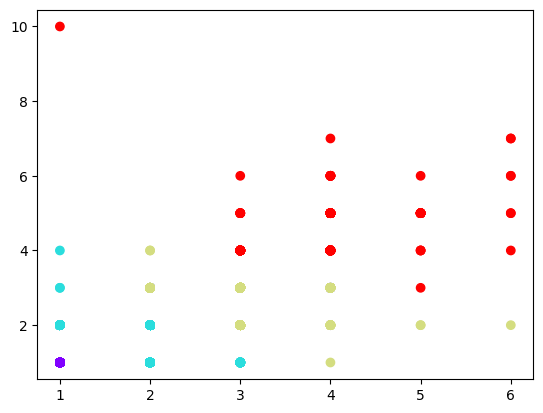

In [24]:
# Graficamos los clusters que encontró el algoritmo
data_with_clusters = rent_data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['BHK'], data_with_clusters['Bathroom'],
            c=data_with_clusters['Clusters'], cmap='rainbow')

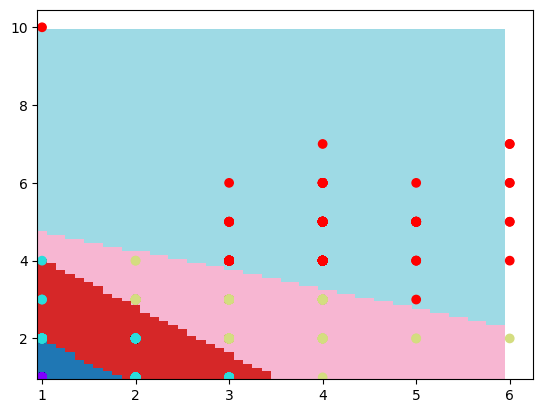

In [25]:
# Dividimos por zonas los clusters identificados por el algoritmo
h = 0.1
x_min, x_max = min(rent_data['BHK']), max(rent_data['BHK'])
y_min, y_max = min(rent_data['Bathroom']), max(rent_data['Bathroom'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
stack1 = np.dstack((xx.flatten(), yy.flatten()))[0, :, :]
y_pred = kmeans.predict(stack1)
vb = y_pred.reshape(np.shape(xx))
plt.pcolormesh(xx, yy, vb, cmap='tab20')
plt.scatter(data_with_clusters['BHK'], data_with_clusters['Bathroom'],
            c=data_with_clusters['Clusters'], cmap='rainbow')

In [26]:
# Realizamos la prueba con otras caracteristicas
x = rent_data.iloc[:, [10, 3]]
# establecemos en cuantos clusters dividimos la bade de datos
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 2, 2, 1])

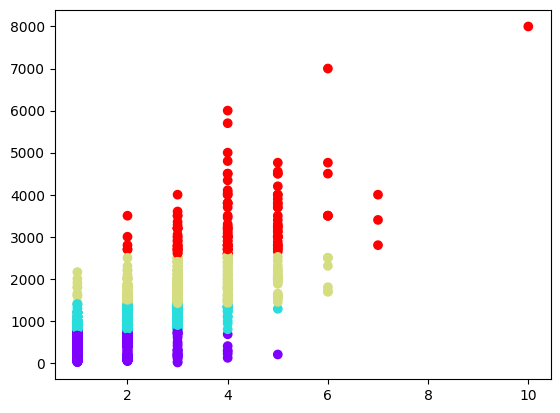

In [27]:
data_with_clusters = rent_data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Bathroom'], data_with_clusters['Size'],
            c=data_with_clusters['Clusters'], cmap='rainbow')

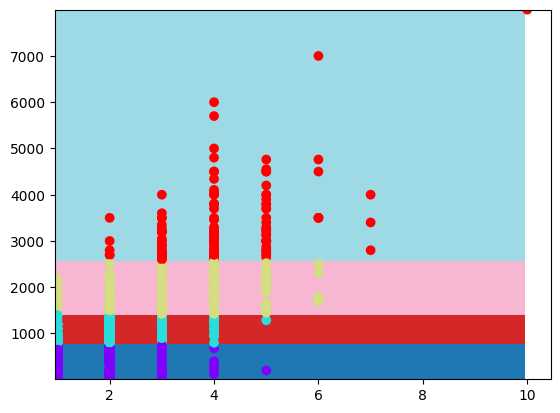

In [28]:
h = 0.1
x_min, x_max = min(rent_data['Bathroom']), max(rent_data['Bathroom'])
y_min, y_max = min(rent_data['Size']), max(rent_data['Size'])
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
stack1 = np.dstack((xx.flatten(), yy.flatten()))[0, :, :]
y_pred = kmeans.predict(stack1)
vb = y_pred.reshape(np.shape(xx))
plt.pcolormesh(xx, yy, vb, cmap='tab20')
plt.scatter(data_with_clusters['Bathroom'], data_with_clusters['Size'],
            c=data_with_clusters['Clusters'], cmap='rainbow')

In [29]:
# Verificamos el clustering con las caracteristicas relacionandolas con la renta que es la prediccion objetivo
x = rent_data.iloc[:, [2, 3, 1, 10]]
x

,Rent,Size,BHK,Bathroom
0,10000,1100,2,2
1,20000,800,2,1
2,17000,1000,2,1
3,10000,800,2,1
4,7500,850,2,1
...,...,...,...,...
4741,15000,1000,2,2
4742,29000,2000,3,3
4743,35000,1750,3,3
4744,45000,1500,3,2


In [30]:
# establecemos en cuantos clusters dividimos la bade de datos
kmeans = KMeans(n_clusters=4)


kmeans.fit(x)


identified_clusters = kmeans.fit_predict(x)


identified_clusters

array([0, 0, 0, ..., 0, 0, 0])

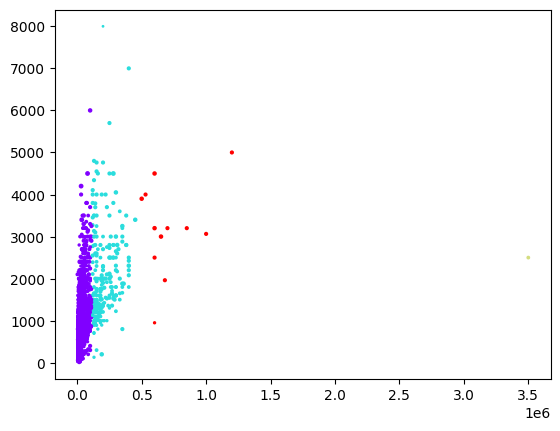

In [32]:
data_with_clusters = rent_data.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.scatter(data_with_clusters['Rent'], data_with_clusters['Size'],
            data_with_clusters['BHK'], c=data_with_clusters['Clusters'], cmap='rainbow')

Text(0, 0.5, 'WCSS')

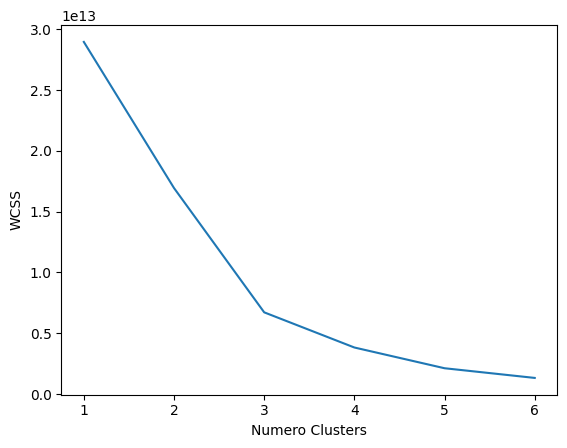

In [33]:
# Dependiendo del dataset podemos estimar con el siguiente algoritmo el numero aproximado de clusters que nos permitan
# una clasificación mas optima
wcss = []
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.xlabel('Numero Clusters')
plt.ylabel('WCSS')

# RED NEURONAL


In [7]:
# Cargar los datos desde el archivo CSV
df = pd.read_csv('House_Rent_Dataset.csv')

# Crear nueva columna 'Puede Arrendar' basada en alguna lógica
# Por ejemplo, aquí asumimos que puedes arrendar si el precio de renta es menor que tu presupuesto
presupuesto = float(input("Ingrese su presupuesto: "))
df['Puede Arrendar'] = (df['Rent'] <= presupuesto).astype(int)

# Codificar variables categóricas usando one-hot encoding
df = pd.get_dummies(df, columns=[
                    'Area Type', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])

# Seleccionar columnas relevantes
features = df[['BHK', 'Size', 'Bathroom', 'Area Type_Super Area', 'Area Type_Carpet Area', 'Furnishing Status_Unfurnished', 'Furnishing Status_Semi-Furnished',
               'Furnishing Status_Furnished', 'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Bachelors', 'Tenant Preferred_Family', 'Point of Contact_Contact Owner', 'Point of Contact_Contact Agent']
              ]

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Seleccionar la columna 'Puede Arrendar' como objetivo
targets = df['Puede Arrendar']

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, targets, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
# Usar activación sigmoide para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test))

# Ahora puedes ingresar datos por teclado y predecir si puedes arrendar o no
nuevos_datos = pd.DataFrame(columns=[
    'BHK', 'Size', 'Bathroom', 'Area Type_Super Area', 'Area Type_Carpet Area', 'Furnishing Status_Unfurnished',
    'Furnishing Status_Semi-Furnished', 'Furnishing Status_Furnished', 'Tenant Preferred_Bachelors/Family',
    'Tenant Preferred_Bachelors', 'Tenant Preferred_Family', 'Point of Contact_Contact Owner', 'Point of Contact_Contact Agent'
])

# Solicitar al usuario que ingrese los valores por teclado
nuevos_datos.loc[0] = [float(input("Ingrese cantidad de habitaciones: ")), float(input("Ingrese tamaño de vivienda: ")),
                       float(input("Ingrese cantidad de baños: ")), 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]

# Normalizar los nuevos datos
nuevos_datos_scaled = scaler.transform(nuevos_datos)

# Realizar la predicción de si puedes arrendar o no
prediccion = model.predict(nuevos_datos_scaled)
if prediccion[0, 0] >= 0.5:
    print("Puedes arrendar la casa.")
else:
    print("No puedes arrendar la casa.")

# Calcular la precisión y la sensibilidad en el conjunto de prueba
y_pred_test = model.predict(X_test)
y_pred_test_binary = (y_pred_test >= 0.5).astype(int)

accuracy_test = accuracy_score(y_test, y_pred_test_binary)
recall_test = recall_score(y_test, y_pred_test_binary)

print(f"Precisión en el conjunto de prueba: {accuracy_test}")

input("Presiona Enter para salir...")

Epoch 1/50
119/119 [==============================] - 2s 8ms/step - loss: 0.5311 - accuracy: 0.7105 - val_loss: 0.4564 - val_accuracy: 0.7674
Epoch 2/50
119/119 [==============================] - 1s 5ms/step - loss: 0.4276 - accuracy: 0.7958 - val_loss: 0.4054 - val_accuracy: 0.8137
Epoch 3/50
119/119 [==============================] - 1s 4ms/step - loss: 0.3962 - accuracy: 0.8222 - val_loss: 0.3822 - val_accuracy: 0.8316
Epoch 4/50
119/119 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8164 - val_loss: 0.3838 - val_accuracy: 0.8316
Epoch 5/50
119/119 [==============================] - 0s 3ms/step - loss: 0.3842 - accuracy: 0.8224 - val_loss: 0.3804 - val_accuracy: 0.8337
Epoch 6/50
119/119 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.8180 - val_loss: 0.3742 - val_accuracy: 0.8326
Epoch 7/50
119/119 [==============================] - 0s 4ms/step - loss: 0.3822 - accuracy: 0.8198 - val_loss: 0.3676 - val_accuracy: 0.8326
Epoch 